In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('data/test.csv', header = None)
df.columns = ['q1', 'q2', 'mid', 'final']
df

,q1,q2,mid,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [4]:
x_data = df.iloc[:,:-1].values
y_data = df.iloc[:,-1].values

In [5]:
x = tf.constant(x_data, tf.float32)
y = tf.constant(y_data, tf.float32)
w = tf.Variable(tf.random.uniform([3,1]))
b = tf.Variable(tf.random.uniform([1]))

In [6]:
def compute_loss():
    hx = tf.matmul(x,w) + b
    c = tf.reduce_mean((hx-y)**2)
    return c

In [7]:
optimizer = Adam(0.1)
for i in range(1000):
    optimizer.minimize(compute_loss, var_list=[w,b])
    print(i, 'cost:', compute_loss().numpy())

0 cost: 2790.0645
1 cost: 1407.5839
2 cost: 1104.0756
3 cost: 1496.4222
4 cost: 2023.9604
5 cost: 2282.287
6 cost: 2194.0212
7 cost: 1880.9056
8 cost: 1511.7795
9 cost: 1225.1482
10 cost: 1097.0486
11 cost: 1130.9897
12 cost: 1268.0796
13 cost: 1419.4078
14 cost: 1508.8748
15 cost: 1503.04
16 cost: 1414.8105
17 cost: 1287.144
18 cost: 1170.2306
19 cost: 1101.7297
20 cost: 1094.8734
21 cost: 1136.809
22 cost: 1197.2356
23 cost: 1243.4664
24 cost: 1254.6538
25 cost: 1228.6322
26 cost: 1179.544
27 cost: 1129.112
28 cost: 1096.3427
29 cost: 1089.9257
30 cost: 1105.9646
31 cost: 1131.4312
32 cost: 1151.2994
33 cost: 1155.6711
34 cost: 1143.5125
35 cost: 1121.7142
36 cost: 1100.6504
37 cost: 1088.8112
38 cost: 1089.085
39 cost: 1098.1979
40 cost: 1109.1946
41 cost: 1115.395
42 cost: 1113.6575
43 cost: 1105.3943
44 cost: 1095.1438
45 cost: 1087.7778
46 cost: 1085.9535
47 cost: 1089.073
48 cost: 1094.0892
49 cost: 1097.4885
50 cost: 1097.2358
51 cost: 1093.6346
52 cost: 1088.7893
53 cost: 1085

In [14]:
def hxfn(xdata):
    xd = np.float32(xdata)
    hx = tf.matmul(xdata, w) + b
    return hx.numpy()

In [15]:
hxfn([[90,80,70]])

array([[147.10806]], dtype=float32)

In [17]:
pred = hxfn(x_data)
pred

array([[152.89047],
       [175.02225],
       [172.69833],
       [185.85292],
       [142.9788 ],
       [120.41519],
       [153.28639],
       [129.16376],
       [168.9753 ],
       [164.06439],
       [147.60843],
       [147.13718],
       [174.99745],
       [150.5892 ],
       [154.0659 ],
       [178.65535],
       [143.50635],
       [175.82294],
       [168.59842],
       [155.96909],
       [171.23717],
       [168.82117],
       [164.82353],
       [149.35748],
       [178.75546]], dtype=float32)

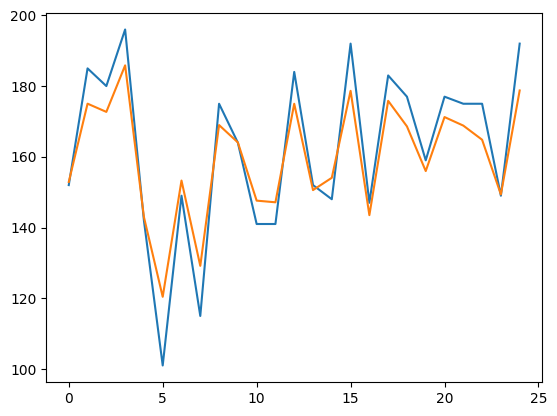

In [18]:
plt.plot(y_data)
plt.plot(pred)
plt.show()